In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from uuid import uuid4


# Extends pandas txt accessor]
from utils import TextAccessor

In [4]:
csv = list(Path().cwd().glob('*.csv'))

In [11]:
pd.read_csv(csv[2]).drop_duplicates(subset=["url"]).to_csv(csv[2], index=False)

In [3]:
csv = Path().cwd().parent/"Clean/dataset.csv"
df = pd.read_csv(str(csv))

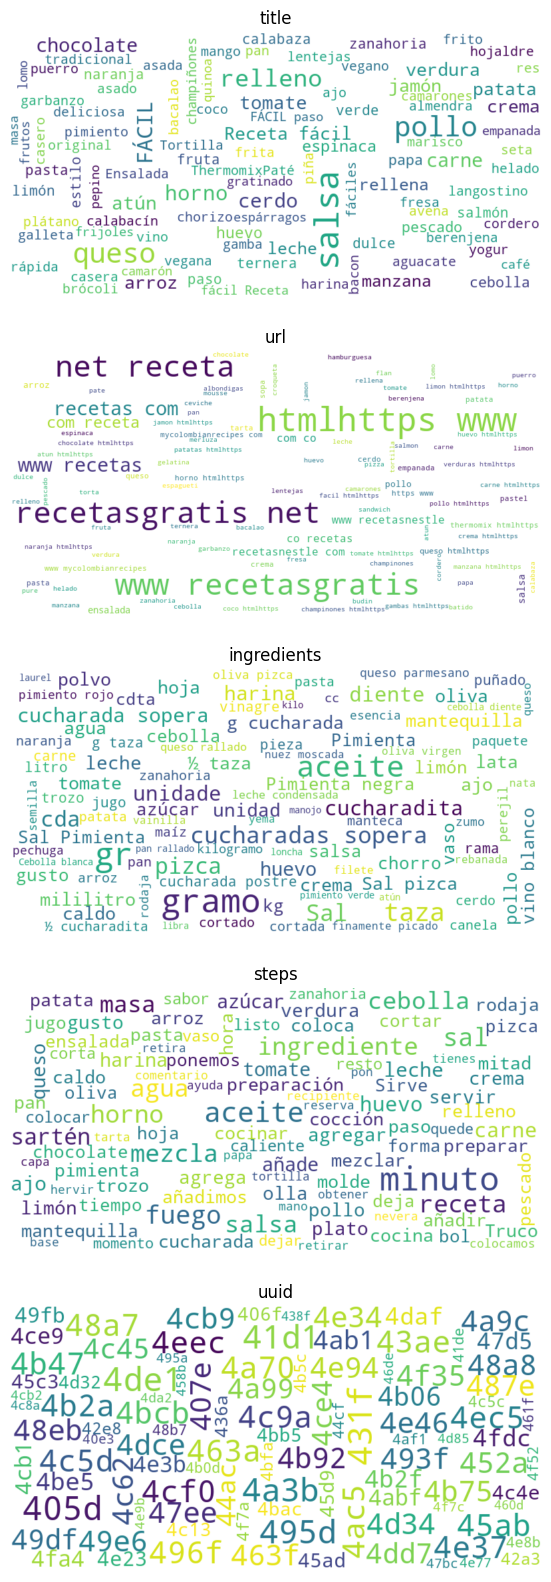

In [4]:
df.utils_text.plot_word_cloud()

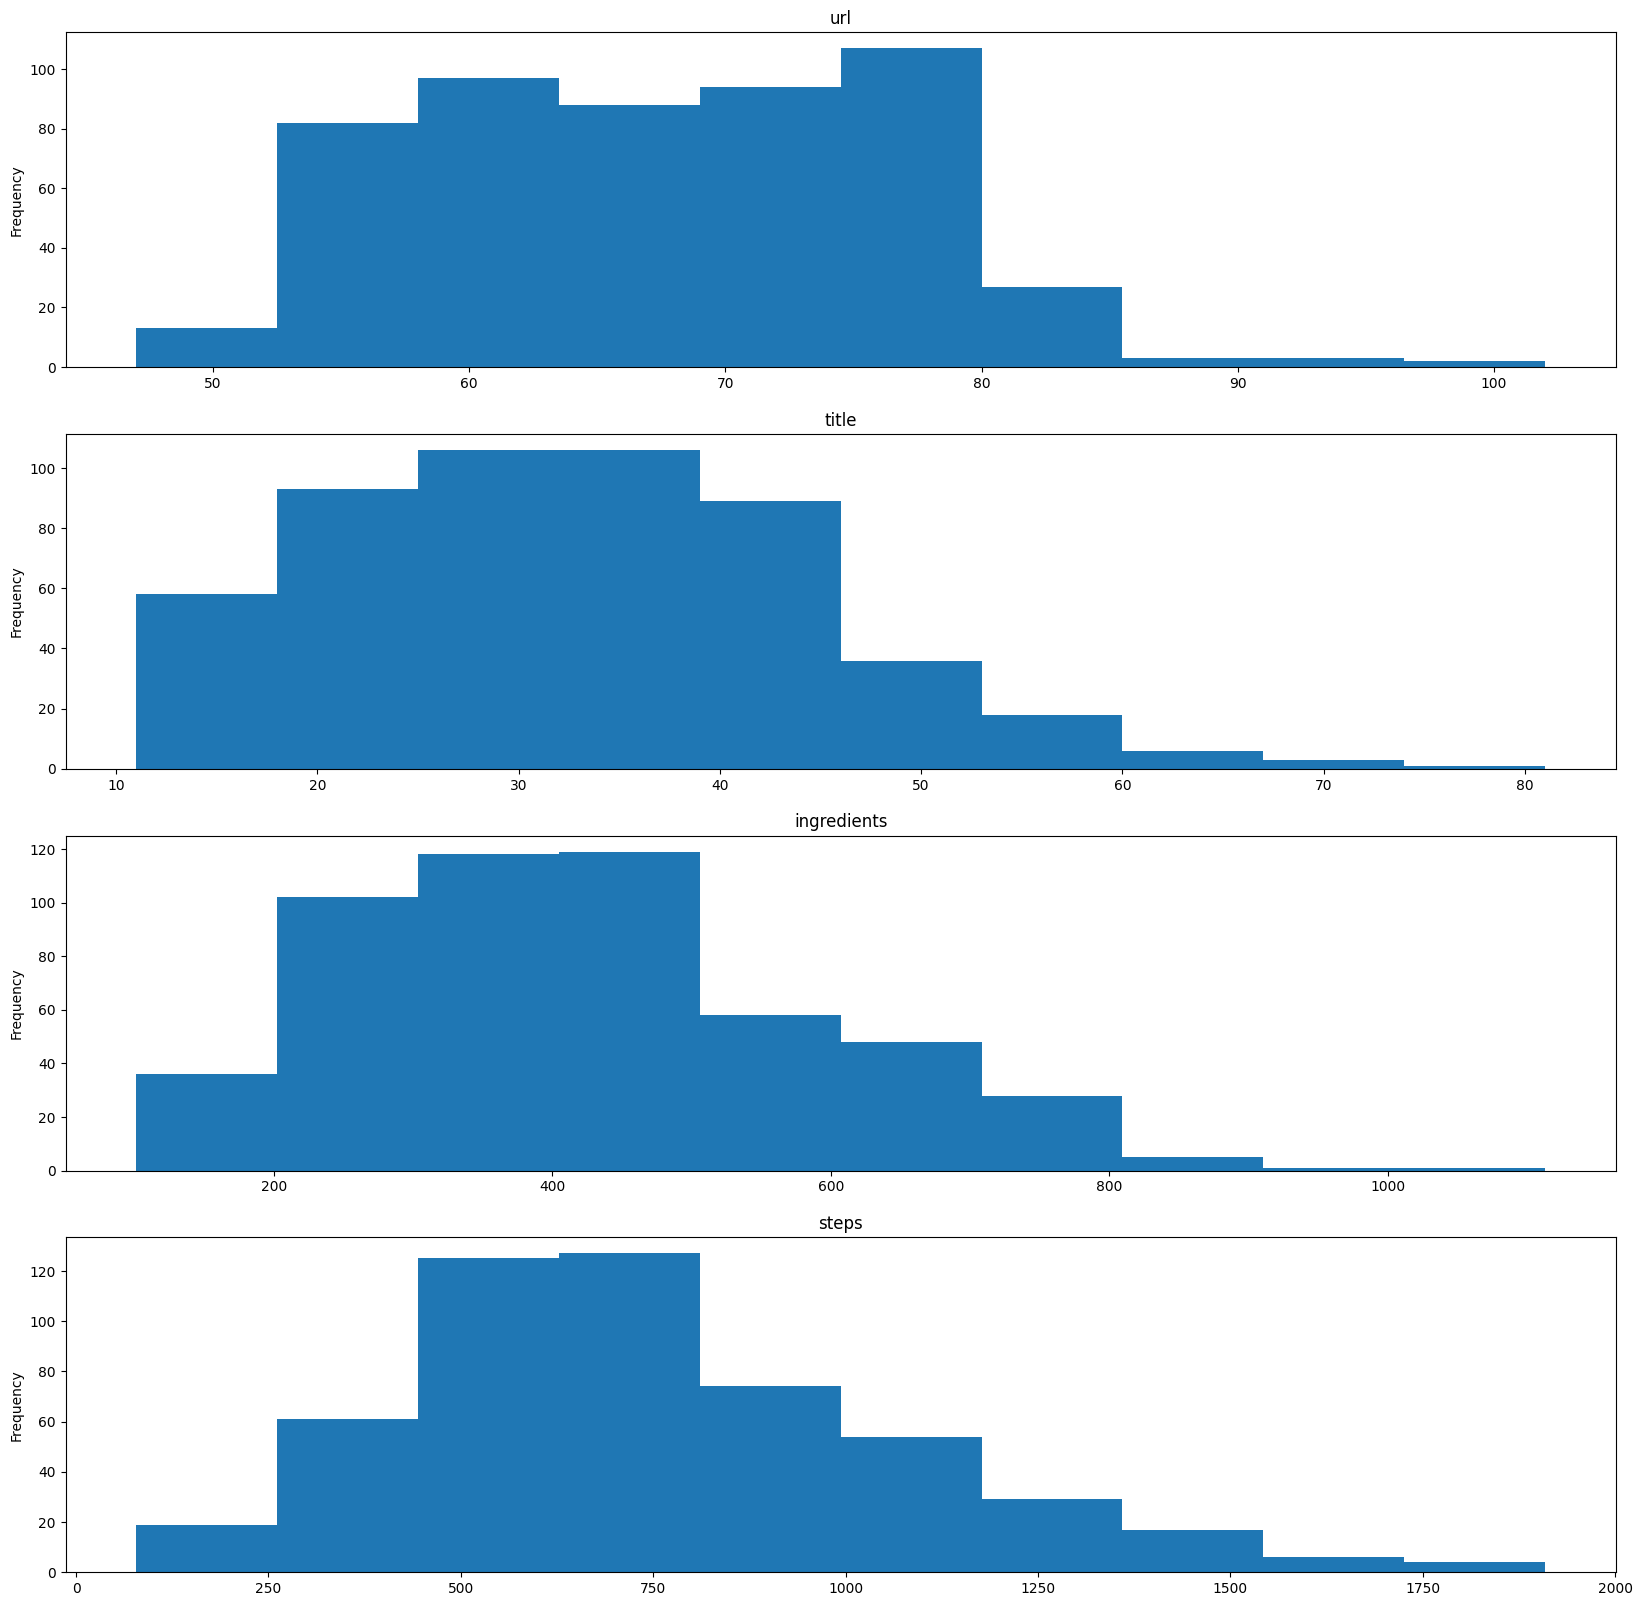

In [14]:
values.utils_text.plot_length_text()

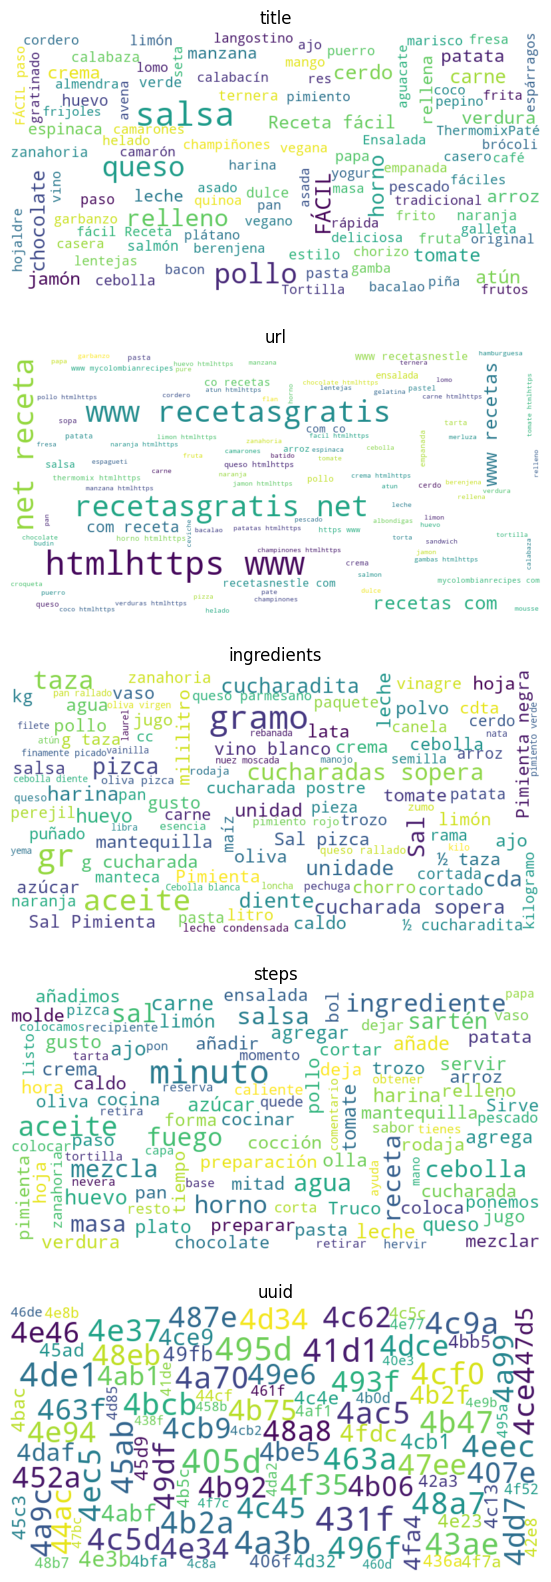

In [5]:
df.utils_text.plot_word_cloud()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28238 entries, 0 to 28237
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        28238 non-null  object
 1   url          28238 non-null  object
 2   ingredients  28237 non-null  object
 3   steps        28238 non-null  object
 4   uuid         28238 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [7]:
from sklearn.model_selection import train_test_split
df_train, df_test_valid = train_test_split(df, test_size=0.2, random_state=42)
df_valid, df_test = train_test_split(df_test_valid, test_size=0.5, random_state=42)

In [ ]:
df_train.to_csv("train.csv", index=False)
df_valid.to_csv("valid.csv", index=False)
df_test.to_csv("test.csv", index=False)